# [K-Means Clustering](#section-title)

- This project explores K-Means Clustering as a means to group similar observations, with the expectation to later use use the resulting cluster labels as inputs to a supervised learning method (known as transfer learning) for a subsequent research project.
- K-Means Clustering is a type of unsupervised learning, meaning that input data is not labeled, the model is used for analysis (as opposed to prediction), train-test-split is not used, it has no feedback mechanism, and there is an unknown number of classes.
- K refers to the number of clusters (chosen by the modeler) and means refers to the mean points of the k clusters.
- **Advantages:** Easy to understand and implement, and popular.
- **Disadvantages:** Fails with non-convex/non-round shaped clusters and clusters of varying densities. Also sensitive to outliers and centroid initiation. Must classify every point.
- Centroids --. default kmeans++ = the centroids are initalized to be distant from each other

- Source: Hank's GA Notes, Lesson 7.01 & 7.02

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import make_column_transformer
from sklearn.cluster import KMeans, DBSCAN
from sklearn.metrics import silhouette_score

In [2]:
# Importing the data frame 
df = pd.read_csv("../data/cleaned_csvs_interim_steps/df_cleaned.csv")

In [3]:
df.head()

,ticker,cik,symbol,description,gics_sector,equity_securities,cap_size,sector_revenue_total_(trillions),total_cap_(trillions),company_name,...,bs_other_than_fixed_noncurrent_assets_value,bs_equity_attributable_to_parent_unit,bs_equity_attributable_to_parent_value,bs_noncurrent_liabilities_unit,bs_noncurrent_liabilities_value,bs_current_liabilities_unit,bs_current_liabilities_value,bs_equity_unit,bs_equity_value,cfs_net_cash_flow_from_op_and_inv
0,AAPL,320193,AAPL,Apple Inc,Information Technology,Common stocks,Large cap,5.8,46.3,Apple Inc.,...,2.123790e+11,USD,6.027400e+10,USD,1.498010e+11,USD,1.249630e+11,USD,6.027400e+10,2.681700e+10
1,MSFT,789019,MSFT,Microsoft Corp,Information Technology,Common stocks,Large cap,5.8,46.3,MICROSOFT CORP,...,1.320780e+11,USD,2.062230e+11,USD,1.016040e+11,USD,1.041490e+11,USD,2.062230e+11,6.490200e+10
2,UNH,731766,UNH,Unitedhealth Group Inc,Health Care,Common stocks,Large cap,2.8,46.3,UNITEDHEALTH GROUP INC,...,1.793690e+11,USD,8.235300e+10,USD,7.502700e+10,USD,1.129810e+11,USD,8.736800e+10,1.035900e+10
3,JNJ,200406,JNJ,Johnson & Johnson,Health Care,Common stocks,Large cap,2.8,46.3,JOHNSON & JOHNSON,...,1.105430e+11,USD,7.514900e+10,USD,6.110700e+10,USD,5.417000e+10,USD,7.640900e+10,3.090000e+08
4,V,1403161,V,Visa Inc Class A,Information Technology,Common stocks,Large cap,5.8,46.3,VISA INC.,...,5.419400e+10,USD,3.898100e+10,USD,2.902300e+10,USD,2.123000e+10,USD,3.898100e+10,5.830000e+09


In [4]:
filtered_columns = [
    "is_cost_of_revenue_value",
    "is_operating_expenses_value",
    "cfs_net_cash_flow_from_op_and_inv",
    "is_revenues_value",
    "bs_current_assets_value",
    "bs_noncurrent_assets_value",
    "bs_current_liabilities_value",
    "bs_noncurrent_liabilities_value",
    "gics_sector",
    "equity_securities",
    "cap_size",
]

df_kmeans = df[filtered_columns]

In [5]:
col_transform = make_column_transformer(
    (StandardScaler(), ["is_cost_of_revenue_value", "is_operating_expenses_value", "cfs_net_cash_flow_from_op_and_inv",
    "is_revenues_value", "bs_current_assets_value", "bs_noncurrent_assets_value", "bs_current_liabilities_value", 
    "bs_noncurrent_liabilities_value"]),  
    (OneHotEncoder(
        drop = 'first',
        handle_unknown = 'ignore',
        sparse_output = False
    ), ['gics_sector', 'equity_securities', 'cap_size']),
    remainder = 'passthrough'
)

In [6]:
df_kmeans_fit_transform = col_transform.fit_transform(df_kmeans) 
df_kmeans_ft = pd.DataFrame(df_kmeans_fit_transform)
df_kmeans_ft.head()

,0,1,2,3,4,5,6,7,8,9,...,17,18,19,20,21,22,23,24,25,26
0,9.453070,4.126666,14.723058,10.803866,1.169892,11.520041,1.318253,14.121161,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,13.780158,18.303373,35.720709,28.280317,1.803077,12.368008,1.084415,9.504999,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,1.923401,23.949439,5.649162,12.295539,0.832833,10.299278,1.183639,6.959535,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,1.598853,3.207883,0.108231,3.246515,0.531629,7.028137,0.522917,5.626319,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,-0.117848,0.811462,3.152159,0.908540,0.234587,2.962152,0.152847,2.553411,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [7]:
ohe_names = col_transform.named_transformers_['onehotencoder'].get_feature_names_out(['gics_sector', 'equity_securities', 'cap_size'])
other_names = ["is_cost_of_revenue_value", "is_revenues_value", "cfs_net_cash_flow_from_op_and_inv",
    "is_gross_profit_value", "bs_current_assets_value", "bs_noncurrent_assets_value", "bs_current_liabilities_value", 
    "bs_noncurrent_liabilities_value"]

col_names = other_names + list(ohe_names)
df_kmeans_ft.columns = col_names
df_kmeans_ft.index = df_kmeans.index
df_kmeans_ft.head()

,is_cost_of_revenue_value,is_revenues_value,cfs_net_cash_flow_from_op_and_inv,is_gross_profit_value,bs_current_assets_value,bs_noncurrent_assets_value,bs_current_liabilities_value,bs_noncurrent_liabilities_value,gics_sector_Consumer Discretionary,gics_sector_Consumer Staples,...,gics_sector_Utilities,equity_securities_Common stocks,equity_securities_MLPs,equity_securities_Mortgage REITs,equity_securities_REITs,equity_securities_Royalty trusts,cap_size_Micro cap,cap_size_Mid cap,cap_size_Small cap,cap_size_Unknown
0,9.453070,4.126666,14.723058,10.803866,1.169892,11.520041,1.318253,14.121161,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,13.780158,18.303373,35.720709,28.280317,1.803077,12.368008,1.084415,9.504999,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,1.923401,23.949439,5.649162,12.295539,0.832833,10.299278,1.183639,6.959535,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,1.598853,3.207883,0.108231,3.246515,0.531629,7.028137,0.522917,5.626319,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,-0.117848,0.811462,3.152159,0.908540,0.234587,2.962152,0.152847,2.553411,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


### Beginning with the default k-means assumptions

In [8]:
km = KMeans(n_init='auto', random_state=42)

# Fit the KMeans model to the one-hot encoded and scaled data
km.fit(df_kmeans_ft)

KMeans(n_init='auto', random_state=42)

In [9]:
# We have 8 default clusters:

clusters = km.n_clusters
print(f'There are {clusters} clusters')

There are 8 clusters


In [10]:
# Assigning labels to a copy of the dataframe

df_kmeans_ft_copy = df_kmeans_ft.copy()
df_kmeans_ft_copy["labels"] = km.labels_
df_kmeans_ft_copy.head()

,is_cost_of_revenue_value,is_revenues_value,cfs_net_cash_flow_from_op_and_inv,is_gross_profit_value,bs_current_assets_value,bs_noncurrent_assets_value,bs_current_liabilities_value,bs_noncurrent_liabilities_value,gics_sector_Consumer Discretionary,gics_sector_Consumer Staples,...,equity_securities_Common stocks,equity_securities_MLPs,equity_securities_Mortgage REITs,equity_securities_REITs,equity_securities_Royalty trusts,cap_size_Micro cap,cap_size_Mid cap,cap_size_Small cap,cap_size_Unknown,labels
0,9.453070,4.126666,14.723058,10.803866,1.169892,11.520041,1.318253,14.121161,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4
1,13.780158,18.303373,35.720709,28.280317,1.803077,12.368008,1.084415,9.504999,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4
2,1.923401,23.949439,5.649162,12.295539,0.832833,10.299278,1.183639,6.959535,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2
3,1.598853,3.207883,0.108231,3.246515,0.531629,7.028137,0.522917,5.626319,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5
4,-0.117848,0.811462,3.152159,0.908540,0.234587,2.962152,0.152847,2.553411,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5


In [11]:
# For reference, any of these columns can be used in the scatterplots below:

df_kmeans_ft.columns

Index(['is_cost_of_revenue_value', 'is_revenues_value',
       'cfs_net_cash_flow_from_op_and_inv', 'is_gross_profit_value',
       'bs_current_assets_value', 'bs_noncurrent_assets_value',
       'bs_current_liabilities_value', 'bs_noncurrent_liabilities_value',
       'gics_sector_Consumer Discretionary', 'gics_sector_Consumer Staples',
       'gics_sector_Energy', 'gics_sector_Financials',
       'gics_sector_Health Care', 'gics_sector_Industrials',
       'gics_sector_Information Technology', 'gics_sector_Materials',
       'gics_sector_Real Estate', 'gics_sector_Utilities',
       'equity_securities_Common stocks', 'equity_securities_MLPs',
       'equity_securities_Mortgage REITs', 'equity_securities_REITs',
       'equity_securities_Royalty trusts', 'cap_size_Micro cap',
       'cap_size_Mid cap', 'cap_size_Small cap', 'cap_size_Unknown'],
      dtype='object')

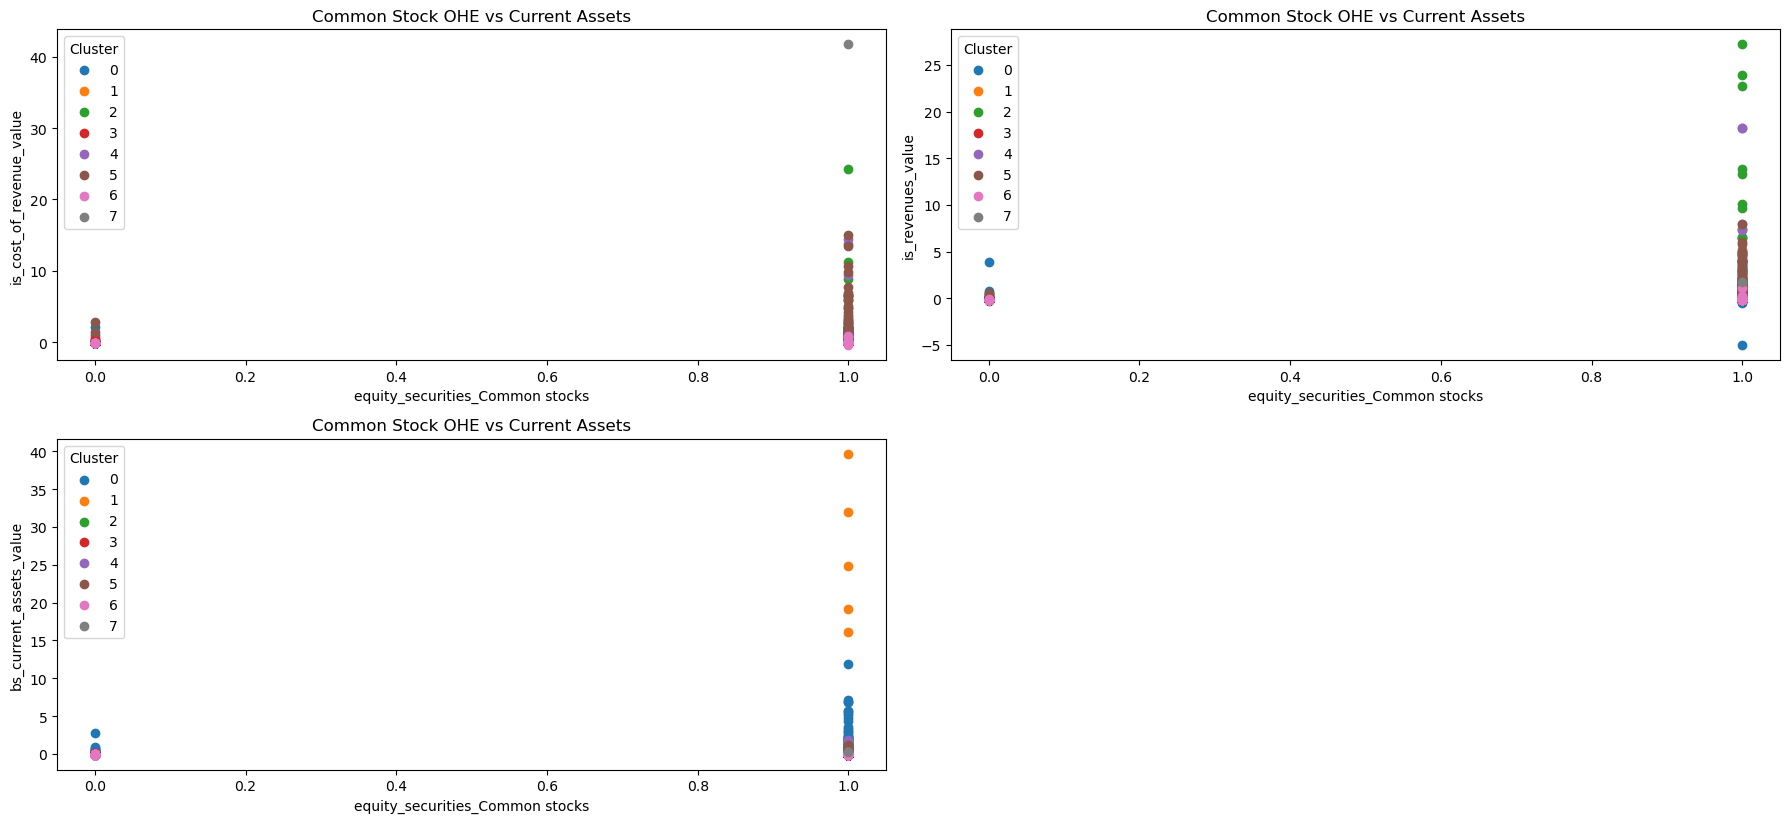

In [12]:
# Explore Clusters with Groupby and Pairplots/Scatterplots

grouped = df_kmeans_ft_copy.groupby('labels')

scatterplot_info = [
    ('equity_securities_Common stocks', 'is_cost_of_revenue_value', 'Common Stock OHE vs Current Assets'), 
    ('equity_securities_Common stocks', 'is_revenues_value', 'Common Stock OHE vs Current Assets'),
    ('equity_securities_Common stocks', 'bs_current_assets_value', 'Common Stock OHE vs Current Assets')
]

plt.figure(figsize=(18, 12))

# Generate scatterplots
for i, (x_col, y_col, title) in enumerate(scatterplot_info, start=1):
    plt.subplot(3, 2, i)
    for name, group in grouped:
        plt.scatter(group[x_col], group[y_col], label=name)
    plt.title(title)
    plt.legend(title='Cluster')
    plt.xlabel(x_col)
    plt.ylabel(y_col)

plt.tight_layout()
plt.show()


## Evaluation Metrics

-Metric for Consideration:

- On the number of clusters: We will explore a range that includes k = 11 (based on domain knowledge of each GICS setcor), k=5 (for different types of equity securities), and k = 4 (for different cap size classifications). Through plots, the silhouette score and inertia score will be used to determine when the number of clusters no longer improves a clustering metric by a noticeable degree.
- The **Silhouette Score** measures how much closer data points are to their own clusters than to the nearest neighboring cluster. The scale of the score is from -1 (bad) to 1 (good). It is calculated based on the cohesion and seperation between points (their average distance of points within clusters, and adjacent to other clusters, respectively). Higher Silhouette Scores means that the clusers are well seperated.
- **Inertia** is analagous to the SSE for each cluster. Low intertia (indicates a dense cluster). As k clusters increase, inertia will decrease. This is because as we add more clusters, the points in each cluster become closer to each other. 

- Reference: Hank's Lectures

In [13]:
# Sihouette Score
sil_score = silhouette_score(df_kmeans_ft_copy, df_kmeans_ft_copy['labels'])
sil_score

0.5796928560906637

In [14]:
# Retrying k-means clustering with different values of k

sil_scores = []

k_vals = range(2, 17)

for k in k_vals: 
    km = KMeans(n_clusters=k, random_state=42)
    km.fit(df_kmeans_ft_copy)
    labels = km.labels_
    sil_score = silhouette_score(df_kmeans_ft_copy, labels)
    sil_scores.append(sil_score)

sil_scores = pd.DataFrame(sil_scores)
sil_scores.head(15) # Because thee are only 15 values from [2, 17)

,0
0,0.514848
1,0.537539
2,0.538857
3,0.550229
4,0.577173
5,0.580321
6,0.580681
7,0.580699
8,0.581046
9,0.481973


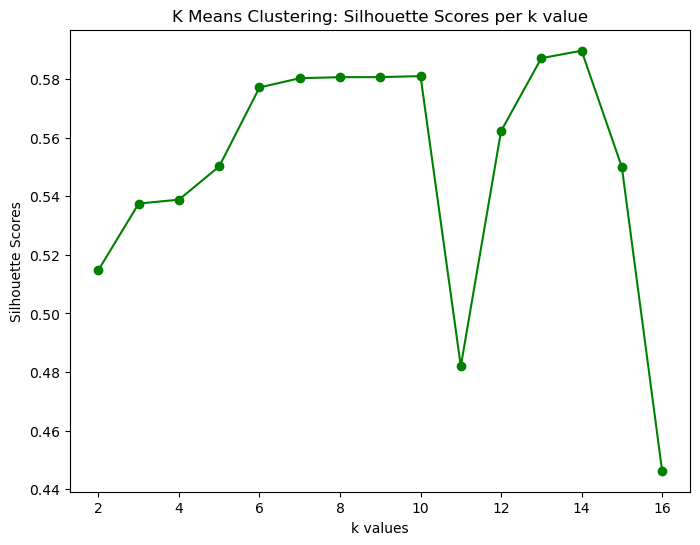

In [15]:
# Plot of Silhouette Scores

plt.figure(figsize=(8,6))
plt.plot(k_vals, sil_scores, marker = 'o', color = 'green')
plt.xlabel('k values')
plt.ylabel('Silhouette Scores')
plt.title('K Means Clustering: Silhouette Scores per k value')
plt.show();

In [16]:
# Inertia Score

inertia_score = km.inertia_
inertia_score

9164.735866800871

In [17]:
# Inertia Scores

inertia_scores = []

k_vals = range(2, 17)

for k in k_vals: 
    km = KMeans(n_clusters=k, random_state=42)
    km.fit(df_kmeans_ft_copy)
    labels = km.labels_
    inertia_scores.append(km.inertia_)    

inertia_scores = pd.DataFrame(inertia_scores)
inertia_scores.head(15) # Because thee are only 15 values from [2, 17)

,0
0,46965.137513
1,35669.653734
2,28728.506900
3,21874.630499
4,18479.606219
5,16908.765526
6,15229.248181
7,14263.644570
8,13139.049228
9,12744.031289


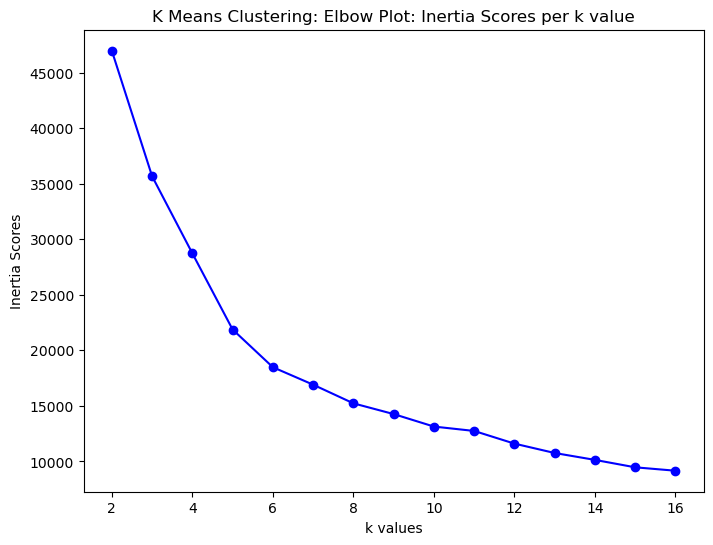

In [18]:
# Elbow Plot of Inertia Scores

plt.figure(figsize=(8,6))
plt.plot(k_vals, inertia_scores, marker = 'o', color = 'blue')
plt.xlabel('k values')
plt.ylabel('Inertia Scores')
plt.title('K Means Clustering: Elbow Plot: Inertia Scores per k value')
plt.show();

In [19]:
# Best k per inertia score on elbow table: 6

---

# [DBSCAN](#section-title)
- DBScan stands for Density-Based Spacial Clustering of Applications with Noise. This model was employed as another means of clustering in order to mitigate some of the disadvantages of k-means, particularly with regard to density.

- min_samples = min # of points needed to form a cluster
- epsilon = the "searching" distance when attempting to build a cluster

- Advantages: Works well with clusters of different density.
- Disadvantages: Does not work well when the individual clusters themselves vary in density, or when there is consistent density among all data points.

In [20]:
# Now we use DBSCAN to cluster:

dbscan = DBSCAN(eps=0.5, min_samples=5) # defaults
dbscan.fit(df_kmeans_ft_copy)
clusters = dbscan.labels_

In [21]:
# Exploring the results of that cluster

df_kmeans_ft_dbscan = df_kmeans_ft.copy()
df_kmeans_ft_dbscan['cluster'] = clusters

# Summary statistics by cluster, transposed
summary = df_kmeans_ft_dbscan.groupby('cluster').mean().T[[0,1]]
summary.head()

cluster,0,1
is_cost_of_revenue_value,-0.127816,-0.046743
is_revenues_value,-0.176183,-0.026067
cfs_net_cash_flow_from_op_and_inv,-0.064530,0.020174
is_gross_profit_value,-0.176716,-0.039658
bs_current_assets_value,-0.089981,-0.057965


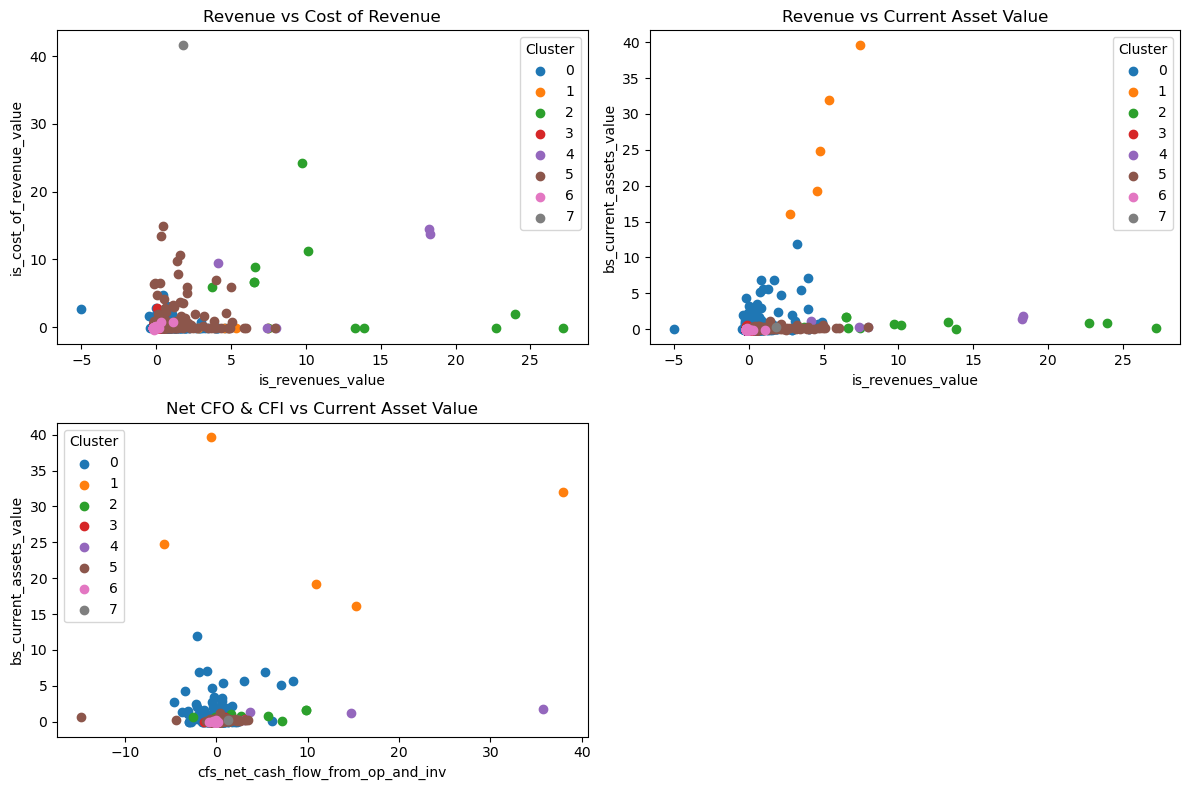

In [22]:
grouped = df_kmeans_ft_copy.groupby('labels')

# Scatterplot configurations
scatterplot_info = [
    ('is_revenues_value', 'is_cost_of_revenue_value', 'Revenue vs Cost of Revenue'), 
    ('is_revenues_value', 'bs_current_assets_value', 'Revenue vs Current Asset Value'),
    ('cfs_net_cash_flow_from_op_and_inv', 'bs_current_assets_value', 'Net CFO & CFI vs Current Asset Value')]
    
plt.figure(figsize=(12, 8))

# Generate scatterplots
for i, (x_col, y_col, title) in enumerate(scatterplot_info, start=1):
    plt.subplot(2, 2, i)
    for name, group in grouped:
        plt.scatter(group[x_col], group[y_col], label=name)
    plt.title(title)
    plt.legend(title='Cluster')
    plt.xlabel(x_col)
    plt.ylabel(y_col)

plt.tight_layout()
plt.show()

## Tuning the Hyperparameters

In [23]:
best_eps = _
best_min_samples = _
best_score = -1
eps_values = np.arange(0.1, 1.0, 0.1)

for eps in eps_values:
    for min_samples in range(2, 17):
        dbscan = DBSCAN(eps=eps, min_samples=min_samples)
        labels = dbscan.fit_predict(df_kmeans_ft_dbscan)
        
        # Only calculate the silhouette score for valid clustering 
        if len(set(labels)) > 1:
            score = silhouette_score(df_kmeans_ft_dbscan, labels)
            if score > best_score:
                best_eps = eps
                best_min_samples = min_samples
                best_score = score
best_score

0.7996087680515889

In [24]:
sil_scores = []

# Define a range of eps values to explore
eps_values = np.arange(0.1, 1.0, 0.1)

for eps in eps_values:
    dbscan = DBSCAN(eps=eps)
    labels = dbscan.fit_predict(df_kmeans_ft_dbscan)

    # Evaluate only if more than one cluster (excluding noise) is found
    if len(set(labels)) - (1 if -1 in labels else 0) > 1:
        sil_score = silhouette_score(df_kmeans_ft_dbscan, labels)
        sil_scores.append(sil_score)
    else:
        sil_scores.append(None)  # If no valid clustering, append None

sil_scores = pd.DataFrame(sil_scores)
sil_scores.head(9) # Only have 9 values = [0,9)

,0
0,0.465256
1,0.645962
2,0.707538
3,0.746087
4,0.778350
5,0.766563
6,0.767338
7,0.768657
8,0.773672


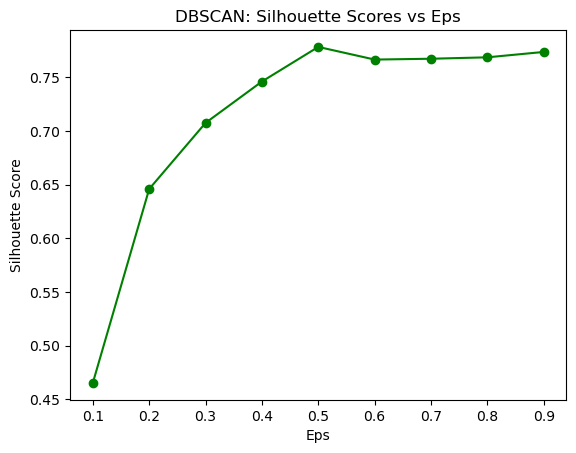

In [25]:
# What are the best hyperparameters?

# Placeholder for silhouette scores
silhouette_scores = []

# Loop through parameter grid (you can also loop through min_samples)
for eps in eps_values:
    dbscan = DBSCAN(eps=eps)
    labels = dbscan.fit_predict(df_kmeans_ft_dbscan)

    # Evaluate only if more than one cluster (excluding noise) is found
    if len(set(labels)) - (1 if -1 in labels else 0) > 1:
        score = silhouette_score(df_kmeans_ft_dbscan, labels)
        silhouette_scores.append(score)
    else:
        silhouette_scores.append(None)  # If no valid clustering, append None

# Plotting the silhouette scores
plt.plot(eps_values, silhouette_scores, marker = 'o', color = 'green')
plt.title('DBSCAN: Silhouette Scores vs Eps')
plt.xlabel('Eps')
plt.ylabel('Silhouette Score')
plt.show()

# Analysis

-A K-Means clustering and DBSCAN model were both evaluated. The K-Means clustering produced a silhouette score based on the chart is highest at ~0.59 when k = 8. With k-means using the elbow plot, the optimal clustering quantity was 6 with an SSE of 15,229. 

-With DBSCAN scan, the optimal eps was determined to be 0.75 which represents how close points should be to each other to be considered a part of a cluster. The Silhouette score was 0.75.

-It is important to note that there is no ground truth in either of these unsupervised learning models, meaning that no baseline is avaiable to which we can compare the silhouette or inertia scores. There is no "correct" number of clusters. With that said, it was determined that the DBSCAN is a more appropriate model because the scatterplots reveal densely packed data when examininig the silhouette scores. 

In [26]:
# Now we use DBSCAN to cluster again with optimal eps = 0.75:

dbscan = DBSCAN(eps=0.75, min_samples=28)
dbscan.fit(df_kmeans_ft_copy)
clusters = dbscan.labels_

In [27]:
# Assigning labels to a copy of the dataframe
df_kmeans_ft_copy = df_kmeans_ft.copy() 
df_kmeans_ft_copy["labels"] = clusters
df_kmeans_ft_copy.head()

,is_cost_of_revenue_value,is_revenues_value,cfs_net_cash_flow_from_op_and_inv,is_gross_profit_value,bs_current_assets_value,bs_noncurrent_assets_value,bs_current_liabilities_value,bs_noncurrent_liabilities_value,gics_sector_Consumer Discretionary,gics_sector_Consumer Staples,...,equity_securities_Common stocks,equity_securities_MLPs,equity_securities_Mortgage REITs,equity_securities_REITs,equity_securities_Royalty trusts,cap_size_Micro cap,cap_size_Mid cap,cap_size_Small cap,cap_size_Unknown,labels
0,9.453070,4.126666,14.723058,10.803866,1.169892,11.520041,1.318253,14.121161,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-1
1,13.780158,18.303373,35.720709,28.280317,1.803077,12.368008,1.084415,9.504999,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-1
2,1.923401,23.949439,5.649162,12.295539,0.832833,10.299278,1.183639,6.959535,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-1
3,1.598853,3.207883,0.108231,3.246515,0.531629,7.028137,0.522917,5.626319,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-1
4,-0.117848,0.811462,3.152159,0.908540,0.234587,2.962152,0.152847,2.553411,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-1


In [28]:
category_counts = df_kmeans_ft_copy['labels'].value_counts(ascending=False, normalize=True)
category_counts_absolute = df_kmeans_ft_copy['labels'].value_counts(ascending=False)

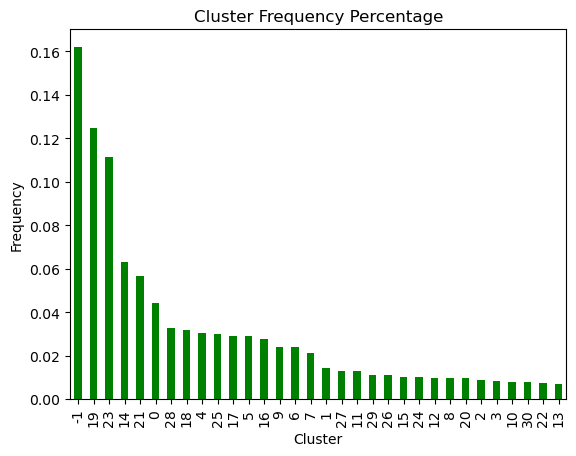

In [29]:
# Creates a bar chart of the category frequencies
category_counts.plot(kind='bar', color='green')

plt.xlabel('Cluster')
plt.ylabel('Frequency')
plt.title('Cluster Frequency Percentage');

Analysis:
- Aside from the outlier cluster "-1", the next two clusters might be driven by "growth" and "required rate of return"
- The number of clustesr at the right end of the bar graph effectively equal the number of one hot encoded columns.

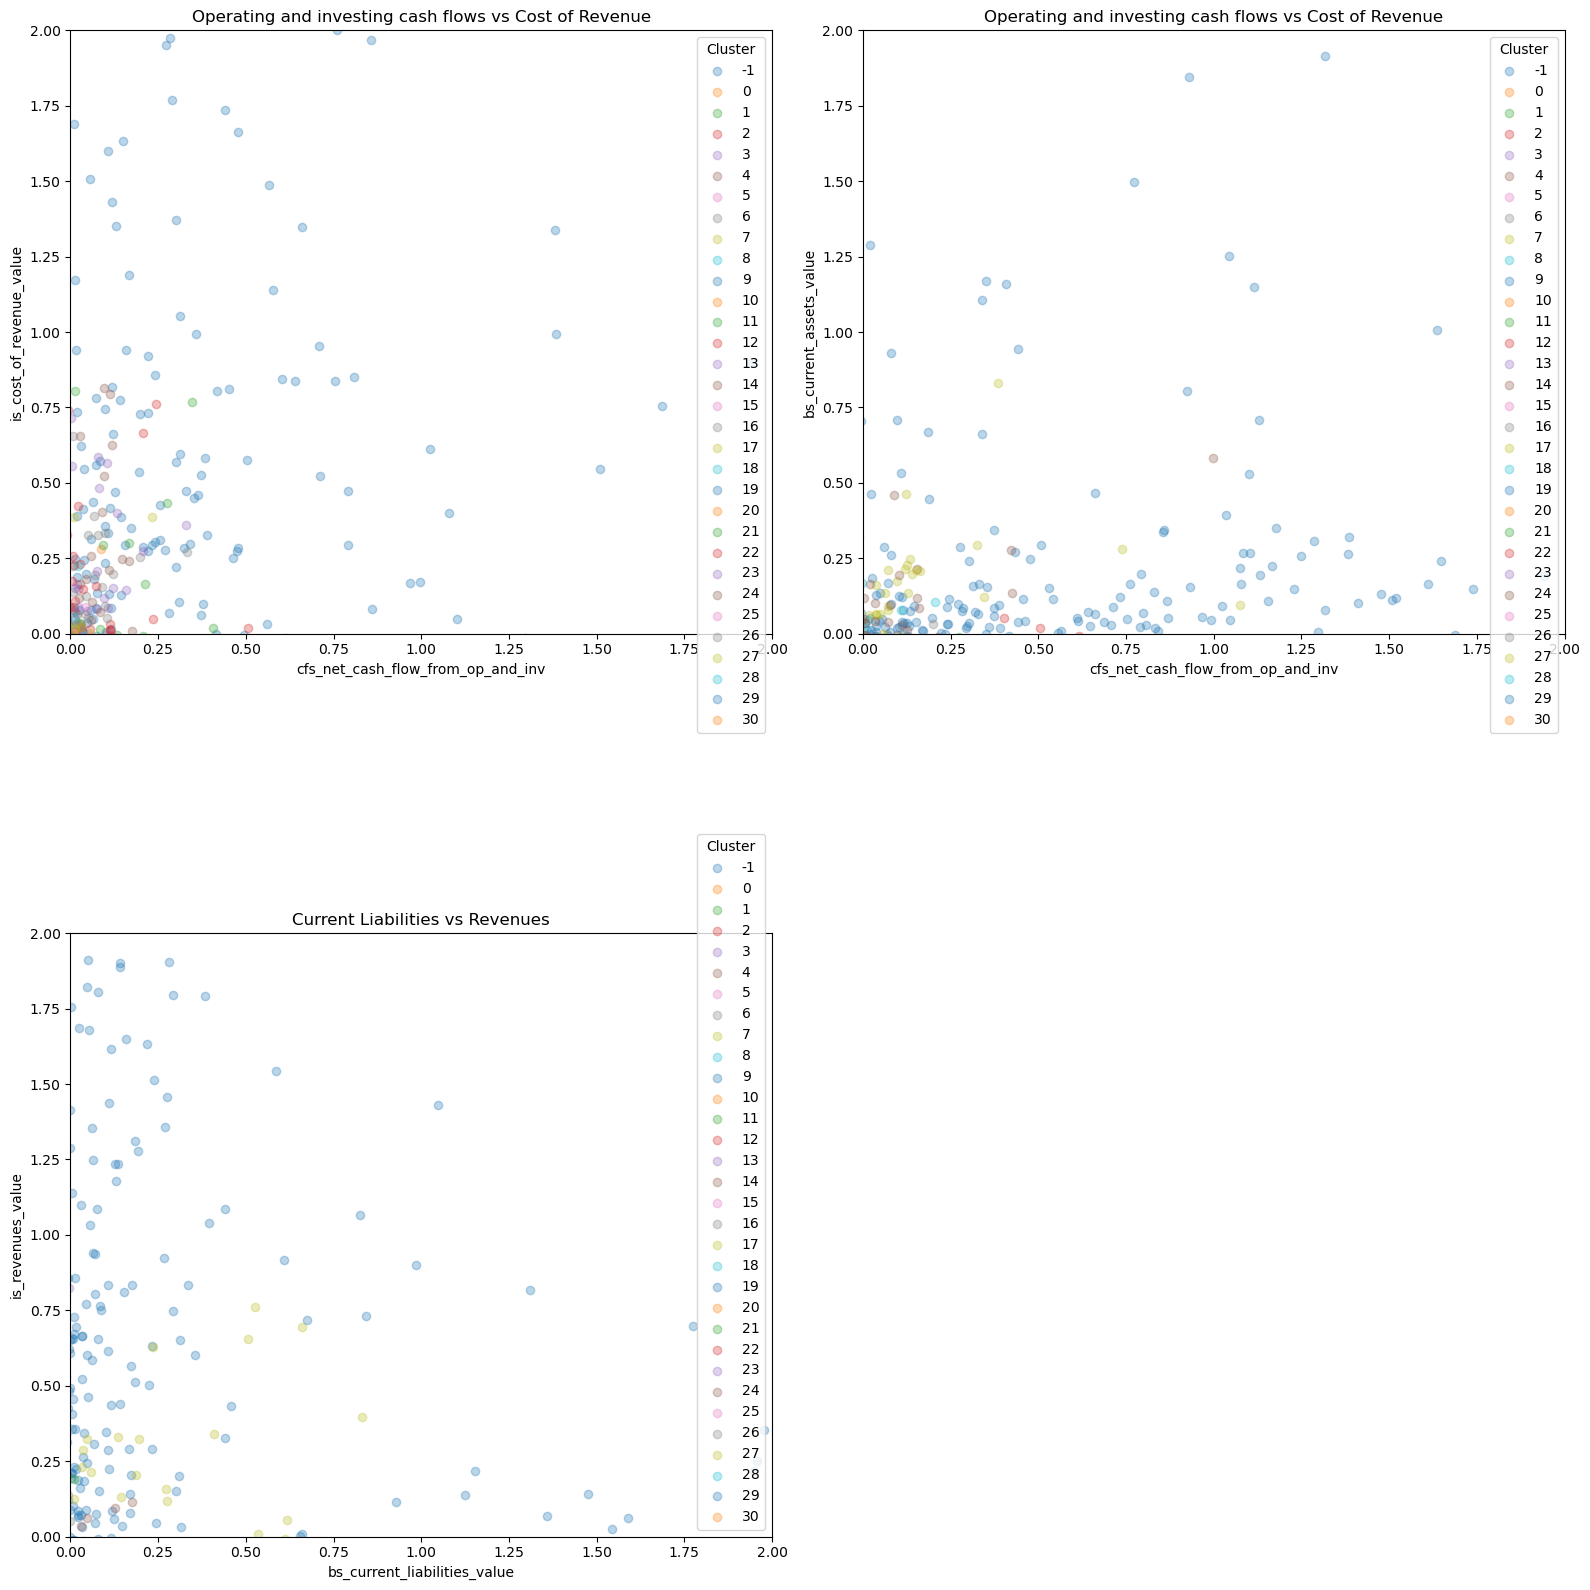

In [30]:
# Explore Clusters with Groupby and Pairplots/Scatterplots

grouped = df_kmeans_ft_copy.groupby('labels')

scatterplot_info = [
    ('cfs_net_cash_flow_from_op_and_inv', 'is_cost_of_revenue_value', 'Operating and investing cash flows vs Cost of Revenue'),
    ('cfs_net_cash_flow_from_op_and_inv', 'bs_current_assets_value', 'Operating and investing cash flows vs Cost of Revenue'),
    ('bs_current_liabilities_value', 'is_revenues_value', 'Current Liabilities vs Revenues')    
]

plt.figure(figsize=(16, 16))

# Generate scatterplots
for i, (x_col, y_col, title) in enumerate(scatterplot_info, start=1):
    plt.subplot(2, 2, i)
    for name, group in grouped:
        plt.scatter(group[x_col], group[y_col], label=name, alpha =.3)
    plt.title(title)
    plt.legend(title='Cluster')
    plt.xlabel(x_col)
    plt.ylabel(y_col)
    # Set the x-axis limits to go from 0 to 10
    plt.xlim(0, 2)
    plt.ylim(0, 2)


plt.tight_layout()
plt.show()

Analysis:
- The features above were selected for additional EDA because they represent key components of the income statement, balance sheet, and cash flow statement, thereby providing a representative sample of the key components of the data.
- Cost of revenue (aka COGS: Cost of Goods Sold) is typically the second line item of an income statement, under revenue. It is a measure of how expensive it is for a company to make their product, which is critical because this guides the company's production strategy and impacts a wide variety of financial valuation metrics. Similarly, from the statement of cash flow, I looked at a joint measure for CFO + CFI to understand the company's cash flows. And lastly, the balance sheet's current asset value reveals its ability to meet short-term needs which can indicate the strength and value of a company.
- When looking at all three of these subplots, we see the scaled values for many quantitative features. The data points that were assigned to the -1 category are consistently outliers throughout the plot, indicating that the model was successful at identifying and excludig this noise from the clusters. Similarly, we can see that the values for the other classifications are densely packed in the bottom left-hand corner.

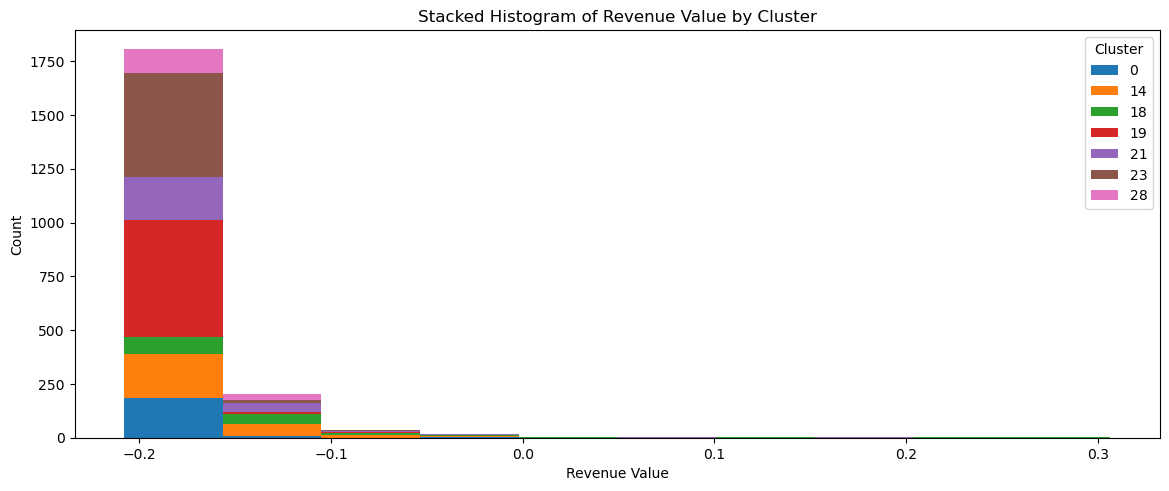

In [31]:
# Creating a Stacked Histogram of Revenue Value by Cluster

# Filter the data frame to only include rows where the value of 'category_counts_absolute' is greater than 135 and the 'labels' value is not equal to -1 or 0
df_filtered = df_kmeans_ft_copy[(df_kmeans_ft_copy['labels'].isin(category_counts_absolute[category_counts_absolute > 135].index)) & (df_kmeans_ft_copy['labels'] != -1)]

plt.figure(figsize=(14, 18))
plt.subplot(3, 1, 1)
label_values = df_filtered['labels'].unique()

# Creates a list to store data for each of the label value
data = [df_filtered[df_filtered['labels'] == label]['is_revenues_value'] for label in label_values]

plt.hist(data, stacked=True, label=label_values)

plt.xlabel('Revenue Value')
plt.ylabel('Count')
plt.title('Stacked Histogram of Revenue Value by Cluster');
plt.legend(title='Cluster');


Analysis:
- The stacked histogram above provides a comprehensive view of total revenue distribution across select clusters, facilitating a cluster-specific revenue breakdown. We've focused on the top 7 clusters, excluding the noise cluster, to ensure clarity while capturing the major revenue contributors. Notably, clusters 19, 23, and 14 emerged as the clusters with the densest cluster of observations with respect to the revenue feature.